## Pipeline介紹
Transformers 庫中最基本的對象是`pipeline()`函數。它將模型與其必要的預處理和後處理步驟連接起來，使我們能夠通過直接輸入任何文字並獲得最終的答案：

目前可用的一些pipeline是：

* 特徵提取（獲取文字的向量表示）
* 填充空缺
* ner（命名實體識別）
* 問答
* 情感分析
* 文字摘要
* 文字生成
* 翻譯
* 零樣本分類

## 執行程式前，請先去Huggingface註冊帳號
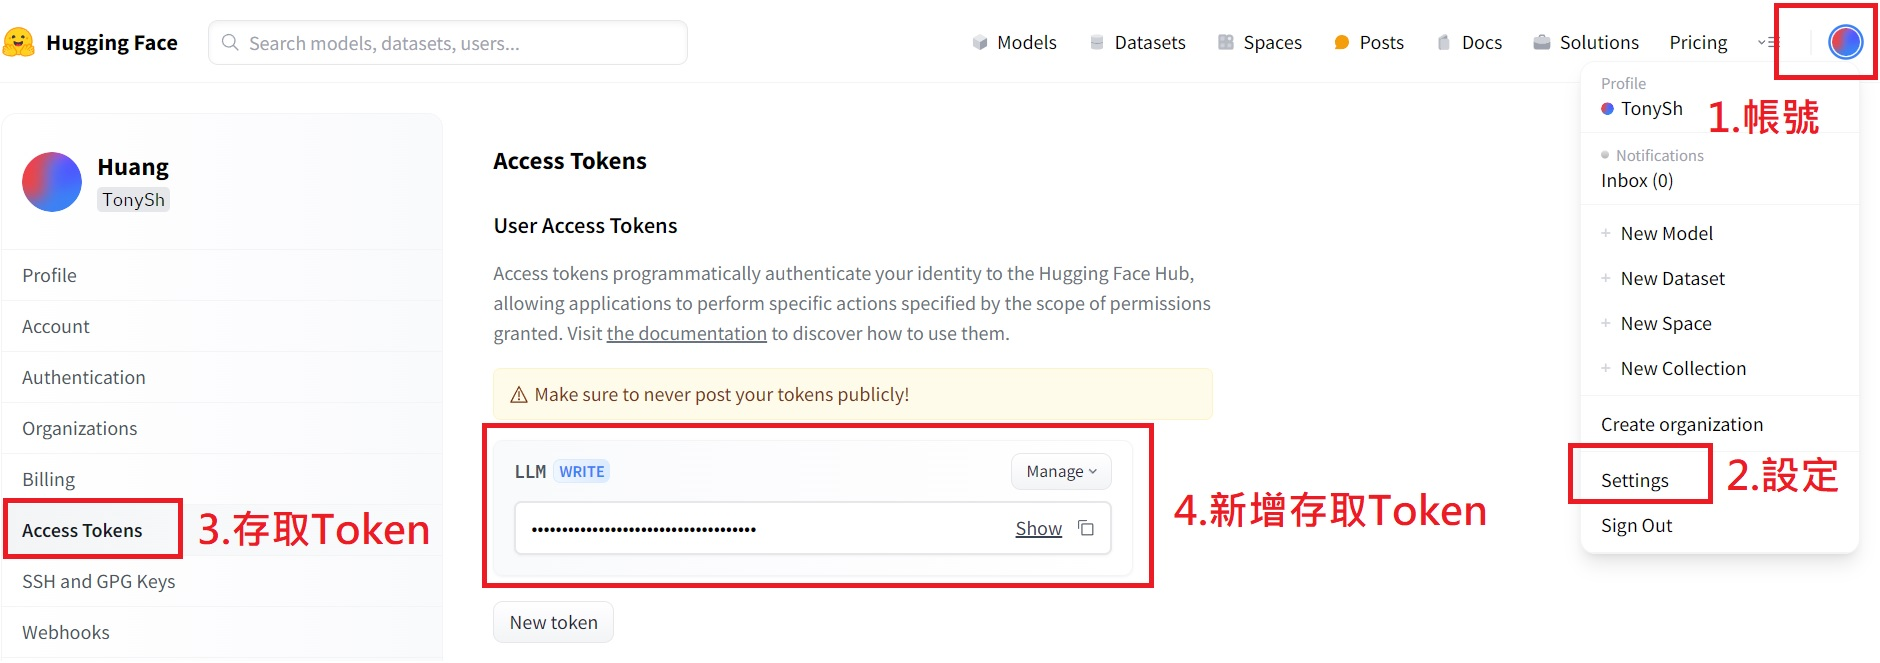

In [1]:
!pip install transformers -U
!pip install sentencepiece # unsupervised text tokenizer and detokenizer
!pip install sacremoses # Tokenizer and Detokenizer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 24.8 MB/s eta 0:00:00


## 新增Haggingface Access Token至左方存取金鑰中
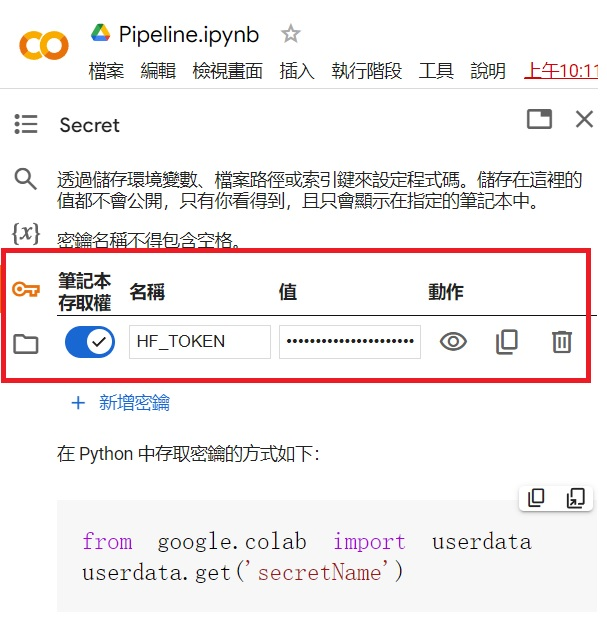

### 情感分析

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier("你敢出去玩試看看")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'NEGATIVE', 'score': 0.8599110841751099}]

In [ ]:
# 使用批次

classifier(
    ["我覺得東西不好吃", "I love this cake"]
)

[{'label': 'NEGATIVE', 'score': 0.8526798486709595},
 {'label': 'POSITIVE', 'score': 0.9998714923858643}]

預設情況下，此pipeline選擇一個特定的預訓練模型，該模型已針對英語情感分析進行了微調。建立分類器物件時，將下載並快取模型。如果您重新執行該命令，則將使用快取的模型，無需再次下載模型。

將一些文字傳遞到pipeline時涉及三個主要步驟：

* 文字被預處理為模型可以理解的格式。
* 預處理的輸入被傳遞給模型。
* 模型處理後輸出最終人類可以理解的結果

### 零樣本分類

對尚未標記的文字進行分類。這是實際專案中的常見場景，因為注釋文字通常很耗時並且需要領域專業知識。對於這項任務`zero-shot-classificationpipeline`非常強大：它允許直接指定用於分類的標籤，因此您不必依賴預訓練模型的標籤。下面的模型展示瞭如何使用這兩個標籤將句子分類為正面或負面——但也可以使用任何其他標籤集對文字進行分類。


In [ ]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")
classifier(
    "你敢出去玩試看看",
    candidate_labels=["出門", "留在家", "再問一次"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': '你敢出去玩試看看',
 'labels': ['出門', '再問一次', '留在家'],
 'scores': [0.3558250367641449, 0.34951236844062805, 0.29466259479522705]}

### 文字生成

提供一個提示，模型將通過生成剩餘的文字來自動完成整段話。

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation")
generator("我等一下要去", num_return_sequences = 2, max_length = 30)

No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': '我等一下要去的想力報化国。 The emperor was looking out'},
 {'generated_text': '我等一下要去的術名而这沉里认。'}]

使用參數`num_return_sequences`控制生成多少個不同的序列，並使用參數`max_length`控制輸出文字的總長度

In [ ]:
generator("我等一下想吃", num_return_sequences = 2, max_length = 30)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': '我等一下想吃,就过重房问题的时�'},
 {'generated_text': '我等一下想吃!\n\n建不是見就不发等'}]

### 在pipeline中使用 Hub 中的其他模型
可以從 Hub 中選擇特定模型以在特定任務的pipeline中使用

In [ ]:
from transformers import pipeline

generator = pipeline("text-generation", model="ckiplab/gpt2-base-chinese")
generator(
    "今天天氣真好，",
    max_length=30,
    num_return_sequences=2,
)

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/421M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/174 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


[{'generated_text': '今天天氣真好， 不 能 進 食 。 」 他 說 ： 「 當 你 帶 了 孩 子 ， 就 算 他 就 是'},
 {'generated_text': '今天天氣真好， 可 以 在 室 外 溫 度 上 下 三 度 的 氣 溫 是 不 好 的 。 大 多 數 的'}]

### Mask filling
填充給定文字中的空白，`top_k`參數控制要顯示的結果有多少種。請注意，這裡模型填充了特殊的`<mask>`詞，它通常被稱為掩碼標記。

In [ ]:
from transformers import pipeline

unmasker = pipeline("fill-mask")
unmasker("這堂課正在教人工<mask>慧有關於大型語<mask>模型.", top_k=1)

No model was supplied, defaulted to distilbert/distilroberta-base and revision ec58a5b (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[[{'score': 0.25238004326820374,
   'token': 49233,
   'token_str': '作',
   'sequence': '<s>這堂課正在教人工作慧有關於大型語<mask>模型.</s>'}],
 [{'score': 0.23459240794181824,
   'token': 49559,
   'token_str': '版',
   'sequence': '<s>這堂課正在教人工<mask>慧有關於大型語版模型.</s>'}]]

### 命名實體識別
命名實體識別 (NER) 是一項任務，其中模型必須找到輸入文字的哪些部分對應於諸如人員、位置或組織之類的實體。

In [ ]:
from transformers import pipeline

ner = pipeline("ner", grouped_entities=True, model="gyr66/RoBERTa-ext-large-chinese-finetuned-ner")
ner("小明去參加苗栗的白沙屯媽祖繞境")

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


[{'entity_group': 'name',
  'score': 0.9998381,
  'word': '小 明',
  'start': 0,
  'end': 2},
 {'entity_group': 'address',
  'score': 0.9999092,
  'word': '苗 栗',
  'start': 5,
  'end': 7},
 {'entity_group': 'scene',
  'score': 0.94925946,
  'word': '白 沙 屯',
  'start': 8,
  'end': 11},
 {'entity_group': 'scene',
  'score': 0.59884006,
  'word': '祖',
  'start': 12,
  'end': 13},
 {'entity_group': 'scene',
  'score': 0.78913534,
  'word': '境',
  'start': 14,
  'end': 15}]

In [ ]:
from transformers import pipeline

ner = pipeline("ner", model = "ckiplab/bert-base-chinese-ner", grouped_entities=True)
ner("我的名字叫陳小明，我在新竹明新科大上課。")

config.json:   0%|          | 0.00/3.71k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/407M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

[{'entity_group': 'PERSON',
  'score': 0.9999994,
  'word': '陳 小',
  'start': 5,
  'end': 7},
 {'entity_group': 'PERSON',
  'score': 0.9999994,
  'word': '明',
  'start': 7,
  'end': 8},
 {'entity_group': 'ORG',
  'score': 0.9993473,
  'word': '新 竹 明 新 科',
  'start': 11,
  'end': 16},
 {'entity_group': 'ORG',
  'score': 0.99999833,
  'word': '大',
  'start': 16,
  'end': 17}]

### 問答系統
問答pipeline使用來自給定上下文回答問題：

In [ ]:
from transformers import pipeline

question_answerer = pipeline("question-answering", model="ckiplab/bert-base-chinese-qa")
question_answerer(
    context="黃小明參加大甲鎮瀾宮繞境",
    question="黃小明參加甚麼活動?",
)

{'score': 0.00012489392247516662, 'start': 5, 'end': 10, 'answer': '大甲鎮瀾宮'}

### 文字摘要
文字摘要是將文字縮減為較短文字的任務，同時保留文字中的主要（重要）信息。下面是一個例子：

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization")
summarizer(
    """
    台北市知名連鎖韓式炸雞店日前遭導盲犬使用者投訴，攜帶導盲犬前往用餐時，卻遭服務人員拒絕入內，事後將過程放上臉書，
    店家事後也發文道歉，北市社會局也說，以要求業者限期改善，對員工教育訓練，若未改善或再犯最高將開罰5萬元，
    並接受4小時講習
"""
)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'summary_text': '    知名連鎖韓式炸雞店日前遭導盲犬使用者\xa0maintained\xa0“帶導’s\u2009”’�文道歉，北市社會局也說’ \xa0-  \xa0\u2009://://://www.com/gououre-goure.org/\xa0-\xa0\xa0- Gourere.com .'}]

### 翻譯
提供語言對（例如「translation_Chinese_to_English」），則可以使用預設模型，但最簡單的方法是在模型中心（hub）選擇要使用的模型

In [ ]:
from transformers import pipeline

translator = pipeline("translation", model="DunnBC22/opus-mt-zh-en-Chinese_to_English")
translator("我參加大甲鎮瀾宮pilgrimage.")

config.json:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/310M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/288 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/282 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/805k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/807k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.75M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

[{'translation_text': '"I\'m in the Pilgrimage of Da Hara.", \'zh\': \'pilgrimage.\'}'}]